In [6]:
import pandas as pd

In [99]:
prefix = "walking_back_"
num_strings = 11
fout="bwalk.csv"

flist = [prefix + str(i+1) + ".csv" for i in range(num_strings)]

flist

['walking_back_1.csv',
 'walking_back_2.csv',
 'walking_back_3.csv',
 'walking_back_4.csv',
 'walking_back_5.csv',
 'walking_back_6.csv',
 'walking_back_7.csv',
 'walking_back_8.csv',
 'walking_back_9.csv',
 'walking_back_10.csv',
 'walking_back_11.csv']

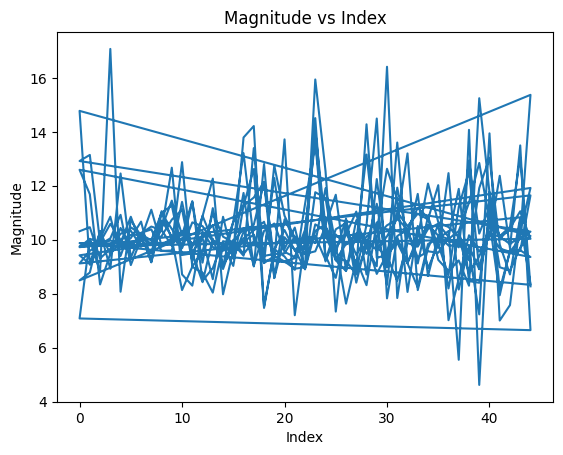

In [100]:
import matplotlib.pyplot as plt

#flist = ['falling_1.csv', 'falling_2.csv', 'falling_3.csv', 'falling_4.csv', 'falling_5.csv', 'falling_6.csv', 'falling_7.csv', 'falling_8.csv', 'falling_9.csv', 'falling_10.csv']

# read data from each file and create a dataframe
dfs = []
for file in flist:
    df = pd.read_csv(file)
    df['magnitude'] = (df['accel_x']**2 + df['accel_y']**2 + df['accel_z']**2 + df['gyro_x']**2 + df['gyro_y']**2 + df['gyro_z']**2)**0.5
    dfs.append(df)
    
# concatenate all dataframes into one
df_concat = pd.concat(dfs)

# plot magnitude vs index
plt.plot(df_concat.index, df_concat['magnitude'])
plt.title('Magnitude vs Index')
plt.xlabel('Index')
plt.ylabel('Magnitude')
plt.show()

In [101]:
df_list = []
for file in flist:
    #print(file)
    dff = pd.read_csv(file)
    df_list.append(dff)
    
rows_list = [df.iloc[10:40] for df in df_list]  # extract rows with index from 10 to 25 from each dataframe
new_df = pd.concat(rows_list)
new_df.to_csv(fout, index=False)

In [102]:
dfn= pd.read_csv(fout)
dfn

,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z
0,-1.04,10.24,-4.06,0.96,-0.34,0.39
1,-0.54,7.90,-4.64,0.05,-0.50,-0.07
2,-0.47,9.93,-4.40,-0.05,-0.46,0.20
3,0.93,8.81,-4.54,-0.22,0.16,0.29
4,-0.23,7.97,-5.78,-0.18,0.06,-0.02
...,...,...,...,...,...,...
325,4.66,5.55,-7.68,-0.06,-0.10,0.85
326,0.81,9.91,-1.40,0.11,-0.16,-1.09
327,-0.08,11.63,-2.35,0.52,0.37,0.21
328,-1.31,7.40,-3.90,-0.11,0.04,0.04


# AVG

In [168]:
import csv
import pandas as pd
import numpy as np

fin = 'walk1.csv'
afout = 'avg_' + fin

#insert raw data
df = pd.read_csv(fin)

# calculate magnitude of acceleration readings
df['Acc_Magnitude'] = df.apply(lambda x: np.sqrt(x[0]**2 + x[1]**2 + x[2]**2), axis=1)

# calculate magnitude of gyro readings
df['Gyro_Magnitude'] = df.apply(lambda x: np.sqrt(x[3]**2 + x[4]**2 + x[5]**2), axis=1)

# extracting the last two columns
dfm=df.iloc[:, -2:]

# splitting the dataframe to multiple dataframes
dfs = []
fsize = 15
#overlap = 8
for i in range(0, len(df), fsize):
    dfs.append(dfm.iloc[i:i+fsize])

# print the extracted dataframes
for i, df_5rows in enumerate(dfs):
    globals()[f"df{i+1}"] = df_5rows
    
# Calculate the average of each DataFrame
avg_list = []
for df in dfs:
    avg = df.mean()
    avg_list.append(avg)

# Create a new DataFrame to store the averages
avg_df = pd.DataFrame(avg_list)

# GET AVG 

with open(afout, 'a') as f:
    avg_df.to_csv(f, header=True, index=False)

In [163]:
dfs[-1].std()

Acc_Magnitude     1.234468
Gyro_Magnitude    0.244875
dtype: float64

In [106]:
avg_df

,Acc_Magnitude,Gyro_Magnitude
0,10.042546,0.811810
1,10.181359,0.642005
2,10.259949,0.560398
3,10.063494,0.601821
4,10.490605,0.642643
5,10.265316,0.608890
6,10.293987,0.419315
7,10.067250,0.648152
8,10.509151,0.722090
9,10.166645,0.685804


In [217]:
# Labeling dataframes

import pandas as pd
import numpy as np

anl = 'avg_'

fall1 = pd.read_csv(anl+'fall1.csv')
fall2 = pd.read_csv(anl+'fall2.csv')
bfall = pd.read_csv(anl+'bfall.csv')
ffall = pd.read_csv(anl+'ffall.csv')
sit1 = pd.read_csv(anl+'sit1.csv')
sit2 = pd.read_csv(anl+'sit2.csv')
walk1 = pd.read_csv(anl+'walk1.csv')
bwalk = pd.read_csv(anl+'bwalk.csv')
fwalk = pd.read_csv(anl+'fwalk.csv')


tfout='train_fw_f2.csv'

df0 = pd.concat([fwalk,bwalk,walk1])
df1 = pd.concat([fall1,fall2,bfall,ffall])
df2 = pd.concat([sit1,sit2])

#df0['label']=np.zeros(df0.shape[0])
df0['label']=np.array(['0']*df0.shape[0])
df1['label']=np.array(['1']*df1.shape[0])
df2['label']=np.array(['2']*df2.shape[0])

dtr = pd.concat([df0, df1], ignore_index=True)
dtr.to_csv(tfout, index=False)

In [183]:
df2

,Acc_Magnitude,Gyro_Magnitude,label
0,9.705127,0.720557,2
1,10.461071,0.666266,2
2,10.212288,0.421943,2
3,10.422039,0.638771,2
4,10.544415,0.737858,2
...,...,...,...
30,10.245451,0.731125,2
31,10.065380,0.661163,2
32,10.132490,0.735624,2
33,10.251431,0.687194,2


# wtAVG

In [186]:
import csv
import pandas as pd
import numpy as np

for sm in smpl:
    fin = sm
    afout = 'wtavg_' + fin

    #insert raw data
    df = pd.read_csv(fin)

    # calculate magnitude of acceleration readings
    df['Acc_Magnitude'] = df.apply(lambda x: np.sqrt(x[0]**2 + x[1]**2 + x[2]**2), axis=1)

    # calculate magnitude of gyro readings
    df['Gyro_Magnitude'] = df.apply(lambda x: np.sqrt(4*x[3]**2 + x[4]**2 + x[5]**2), axis=1)

    # extracting the last two columns
    dfm=df.iloc[:, -2:]

    # splitting the dataframe to multiple dataframes
    dfs = []
    fsize = 15
    #overlap = 8
    for i in range(0, len(df), fsize):
        dfs.append(dfm.iloc[i:i+fsize])

    # print the extracted dataframes
    for i, df_5rows in enumerate(dfs):
        globals()[f"df{i+1}"] = df_5rows

    # Calculate the average of each DataFrame
    avg_list = []
    for df in dfs:
        avg = df.mean()
        avg_list.append(avg)

    # Create a new DataFrame to store the averages
    avg_df = pd.DataFrame(avg_list)

    # GET AVG 

    with open(afout, 'a') as f:
        avg_df.to_csv(f, header=True, index=False)

In [211]:
# Labeling dataframes

import pandas as pd
import numpy as np

anl = 'wtavg_'

fall1 = pd.read_csv(anl+'fall1.csv')
fall2 = pd.read_csv(anl+'fall2.csv')
bfall = pd.read_csv(anl+'bfall.csv')
ffall = pd.read_csv(anl+'ffall.csv')
sit1 = pd.read_csv(anl+'sit1.csv')
sit2 = pd.read_csv(anl+'sit2.csv')
walk1 = pd.read_csv(anl+'walk1.csv')
bwalk = pd.read_csv(anl+'bwalk.csv')
fwalk = pd.read_csv(anl+'fwalk.csv')


tfout='train_wtavg.csv'

df0 = pd.concat([fwalk,bwalk,walk1])
df1 = pd.concat([fall1,fall2,bfall,ffall])
df2 = pd.concat([sit1,sit2])

#df0['label']=np.zeros(df0.shape[0])
df0['label']=np.array(['0']*df0.shape[0])
df1['label']=np.array(['1']*df1.shape[0])
df2['label']=np.array(['2']*df2.shape[0])

dtr = pd.concat([df0, df1], ignore_index=True)
dtr.to_csv(tfout, index=False)

# STD

In [164]:
smpl=['fall1.csv','fall2.csv','bfall.csv','ffall.csv','sit1.csv','sit2.csv','walk1.csv','bwalk.csv','fwalk.csv']

In [169]:
import csv
import pandas as pd
import numpy as np

for sm in smpl:
    fin = sm
    afout = 'std_' + fin

    #insert raw data
    df = pd.read_csv(fin)

    # calculate magnitude of acceleration readings
    df['Acc_Magnitude'] = df.apply(lambda x: np.sqrt(x[0]**2 + x[1]**2 + x[2]**2), axis=1)

    # calculate magnitude of gyro readings
    df['Gyro_Magnitude'] = df.apply(lambda x: np.sqrt(x[3]**2 + x[4]**2 + x[5]**2), axis=1)

    # extracting the last two columns
    dfm=df.iloc[:, -2:]

    # splitting the dataframe to multiple dataframes
    dfs = []
    fsize = 15
    #overlap = 8
    for i in range(0, len(df), fsize):
        dfs.append(dfm.iloc[i:i+fsize])

    # print the extracted dataframes
    for i, df_5rows in enumerate(dfs):
        globals()[f"df{i+1}"] = df_5rows

    # Calculate the average of each DataFrame
    std_list = []
    for df in dfs:
        std = df.std()
        std_list.append(std)

    # Create a new DataFrame to store the averages
    std_df = pd.DataFrame(std_list)

    # GET AVG 

    with open(afout, 'a') as f:
        std_df.to_csv(f, header=True, index=False)

In [205]:
# Labeling dataframes

import pandas as pd
import numpy as np

fall1 = pd.read_csv('std_fall1.csv')
fall2 = pd.read_csv('std_fall2.csv')
bfall = pd.read_csv('std_bfall.csv')
ffall = pd.read_csv('std_ffall.csv')
sit1 = pd.read_csv('std_sit1.csv')
sit2 = pd.read_csv('std_sit2.csv')
walk1 = pd.read_csv('std_walk1.csv')
bwalk = pd.read_csv('std_bwalk.csv')
fwalk = pd.read_csv('std_fwalk.csv')


tfout='train_std.csv'

df0 = pd.concat([fwalk,bwalk,walk1])
df1 = pd.concat([fall1,fall2,bfall,ffall])
df2 = pd.concat([sit1,sit2])

#df0['label']=np.zeros(df0.shape[0])
df0['label']=np.array(['0']*df0.shape[0])
df1['label']=np.array(['1']*df1.shape[0])
df2['label']=np.array(['2']*df2.shape[0])

dtr = pd.concat([df0, df1], ignore_index=True)
dtr.to_csv(tfout, index=False)

In [215]:
tfout

'train_wtavg.csv'

# wtSTD

In [190]:
import csv
import pandas as pd
import numpy as np

for sm in smpl:
    fin = sm
    afout = 'wtstd_' + fin

    #insert raw data
    df = pd.read_csv(fin)

    # calculate magnitude of acceleration readings
    df['Acc_Magnitude'] = df.apply(lambda x: np.sqrt(x[0]**2 + x[1]**2 + x[2]**2), axis=1)

    # calculate magnitude of gyro readings
    df['Gyro_Magnitude'] = df.apply(lambda x: np.sqrt(4*x[3]**2 + x[4]**2 + x[5]**2), axis=1)

    # extracting the last two columns
    dfm=df.iloc[:, -2:]

    # splitting the dataframe to multiple dataframes
    dfs = []
    fsize = 15
    #overlap = 8
    for i in range(0, len(df), fsize):
        dfs.append(dfm.iloc[i:i+fsize])

    # print the extracted dataframes
    for i, df_5rows in enumerate(dfs):
        globals()[f"df{i+1}"] = df_5rows

    # Calculate the average of each DataFrame
    std_list = []
    for df in dfs:
        std = df.std()
        std_list.append(std)

    # Create a new DataFrame to store the averages
    std_df = pd.DataFrame(std_list)

    # GET AVG 

    with open(afout, 'a') as f:
        std_df.to_csv(f, header=True, index=False)

In [199]:
# Labeling dataframes

import pandas as pd
import numpy as np

anl = 'wtstd_'

fall1 = pd.read_csv(anl+'fall1.csv')
fall2 = pd.read_csv(anl+'fall2.csv')
bfall = pd.read_csv(anl+'bfall.csv')
ffall = pd.read_csv(anl+'ffall.csv')
sit1 = pd.read_csv(anl+'sit1.csv')
sit2 = pd.read_csv(anl+'sit2.csv')
walk1 = pd.read_csv(anl+'walk1.csv')
bwalk = pd.read_csv(anl+'bwalk.csv')
fwalk = pd.read_csv(anl+'fwalk.csv')


tfout='train_wtstd.csv'

df0 = pd.concat([fwalk,bwalk,walk1])
df1 = pd.concat([fall1,fall2,bfall,ffall])
df2 = pd.concat([sit1,sit2])

#df0['label']=np.zeros(df0.shape[0])
df0['label']=np.array(['0']*df0.shape[0])
df1['label']=np.array(['1']*df1.shape[0])
df2['label']=np.array(['2']*df2.shape[0])

dtr = pd.concat([df0, df1], ignore_index=True)
dtr.to_csv(tfout, index=False)

In [200]:
tfout

'train_wtstd.csv'

# KNN

In [218]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

for k in range(1,50):
    # Load the dataset
    data = pd.read_csv(tfout)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, :-1], data.iloc[:, -1], test_size=0.2, random_state=42)

    # Create a KNN classifier with k=5

    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the classifier on the training data
    knn.fit(X_train, y_train)

    # Use the classifier to predict the labels of the test data
    y_pred = knn.predict(X_test)

    # Calculate the accuracy of the classifier
    accuracy = accuracy_score(y_test, y_pred)

    print(k)
    print(f"Accuracy: {accuracy}")

1
Accuracy: 0.9090909090909091
2
Accuracy: 0.9090909090909091
3
Accuracy: 0.9090909090909091
4
Accuracy: 0.9090909090909091
5
Accuracy: 0.8787878787878788
6
Accuracy: 0.9090909090909091
7
Accuracy: 0.8787878787878788
8
Accuracy: 0.8787878787878788
9
Accuracy: 0.8787878787878788
10
Accuracy: 0.8787878787878788
11
Accuracy: 0.8787878787878788
12
Accuracy: 0.8787878787878788
13
Accuracy: 0.8787878787878788
14
Accuracy: 0.8787878787878788
15
Accuracy: 0.8787878787878788
16
Accuracy: 0.9090909090909091
17
Accuracy: 0.9090909090909091
18
Accuracy: 0.9090909090909091
19
Accuracy: 0.8787878787878788
20
Accuracy: 0.9393939393939394
21
Accuracy: 0.9090909090909091
22
Accuracy: 0.9090909090909091
23
Accuracy: 0.9090909090909091
24
Accuracy: 0.9393939393939394
25
Accuracy: 0.8787878787878788
26
Accuracy: 0.9393939393939394
27
Accuracy: 0.9393939393939394
28
Accuracy: 0.9393939393939394
29
Accuracy: 0.9393939393939394
30
Accuracy: 0.9393939393939394
31
Accuracy: 0.9393939393939394
32
Accuracy: 0.93

In [219]:
data = pd.read_csv(tfout)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, :-1], data.iloc[:, -1], test_size=0.2, random_state=42)

# Create a KNN classifier with k=5
k=30
knn = KNeighborsClassifier(n_neighbors=k)

# Train the classifier on the training data
knn.fit(X_train, y_train)

# Use the classifier to predict the labels of the test data
y_pred = knn.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)

print(k)
print(f"Accuracy: {accuracy}")

30
Accuracy: 0.9393939393939394


In [214]:
print(y_test.values)
print(y_pred)

[1 1 1 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 1 1 0 1 1 1 1 0]
[1 1 1 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 1 1 0 1 1 1 0 0]


In [220]:
from joblib import dump, load

dump(knn, 'model_avg.pkl')

['model_avg.pkl']